# Importing libraries

In [1]:
import kagglehub

path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Mike\.cache\kagglehub\datasets\aslanahmedov\walmart-sales-forecast\versions\1


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Merging 3 dataset together

In [13]:
df_store = pd.read_csv('stores.csv') #store data

In [14]:
df_features = pd.read_csv('features.csv') #store data

In [15]:
df_train = pd.read_csv('train.csv') #store data

In [16]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


# Droping duplicate column

In [17]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) 

In [18]:
df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

In [19]:
df.shape

(421570, 16)

In [20]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [22]:
nan_counts = df.isna().sum()
print(nan_counts)

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


In [23]:
negative_count = (df['Weekly_Sales'] < 0).sum()
print("Number of negative values:", negative_count)

Number of negative values: 1285


### After doing some simple overview we discover that we have a lot of nan values and negative values in "weekly sales" so lets fix it

In [24]:
df = df.loc[df['Weekly_Sales'] > 0]

In [25]:
df = df.fillna(0)

In [26]:
nan_counts = df.isna().sum()
print(nan_counts)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [27]:
df.describe() 

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [28]:
wrong_sales_count = (df['Weekly_Sales'] < 1).sum()
print("Number of values:", wrong_sales_count)

Number of values: 648


### The weekly sales can not be 0 or lower than 1 and it must be a mistake so lets remove any value that is less than 1

In [29]:
df = df.loc[df['Weekly_Sales'] >= 1]

In [30]:
df.shape

(419564, 16)

In [31]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

### I decided to see if all holidays have same influence on the sales, thats why I made holiday map and build histogram of sales for each one of them

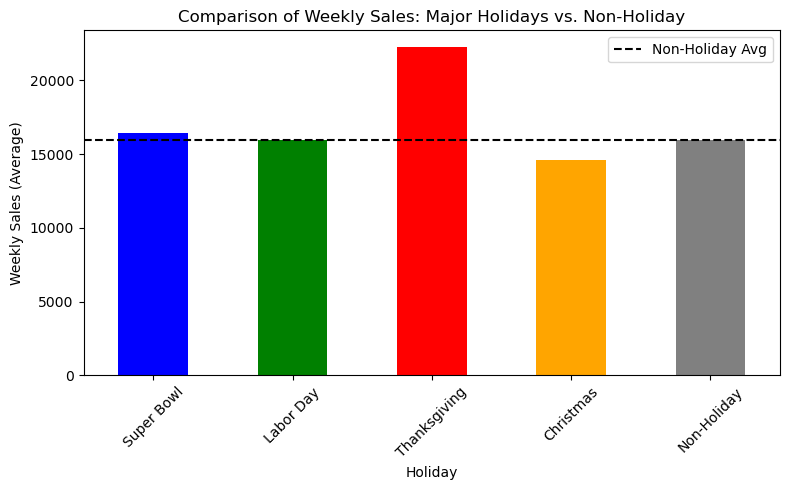

In [32]:
df_holiday = df[df['IsHoliday'] == True].copy()
holiday_map = {
    '2010-02-12': 'Super Bowl',  '2011-02-11': 'Super Bowl',  '2012-02-10': 'Super Bowl',
    '2010-09-10': 'Labor Day',   '2011-09-09': 'Labor Day',   '2012-09-07': 'Labor Day',
    '2010-11-26': 'Thanksgiving','2011-11-25': 'Thanksgiving',
    '2010-12-31': 'Christmas',   '2011-12-30': 'Christmas' }

df_holiday['HolidayName'] = df_holiday['Date'].map(holiday_map)
holidays_of_interest = ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas']
df_holiday = df_holiday[df_holiday['HolidayName'].isin(holidays_of_interest)]

sales_by_holiday = df_holiday.groupby('HolidayName')['Weekly_Sales'].mean()
non_holiday_avg = df.loc[df['IsHoliday'] == False, 'Weekly_Sales'].mean()
combined_sales = pd.concat([ sales_by_holiday, pd.Series({'Non-Holiday': non_holiday_avg})])

holiday_order = ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Non-Holiday']
combined_sales = combined_sales.reindex(holiday_order)

color_map = {'Super Bowl': 'blue', 'Labor Day': 'green', 'Thanksgiving': 'red', 'Christmas': 'orange', 'Non-Holiday': 'gray'}
bar_colors = [color_map[h] for h in holiday_order]

plt.figure(figsize=(8, 5))
combined_sales.plot(kind='bar', color=bar_colors)
plt.axhline(y=non_holiday_avg, color='black', linestyle='--', label='Non-Holiday Avg')
plt.title('Comparison of Weekly Sales: Major Holidays vs. Non-Holiday')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales (Average)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### As we can see only Super Bowl and Thanksgiving day had positive influence on the sales with Christmas being having a negative influence
### It is weird but probably because people buy stuff 2 weeks or so before holiday so that why i decided to check this theory next

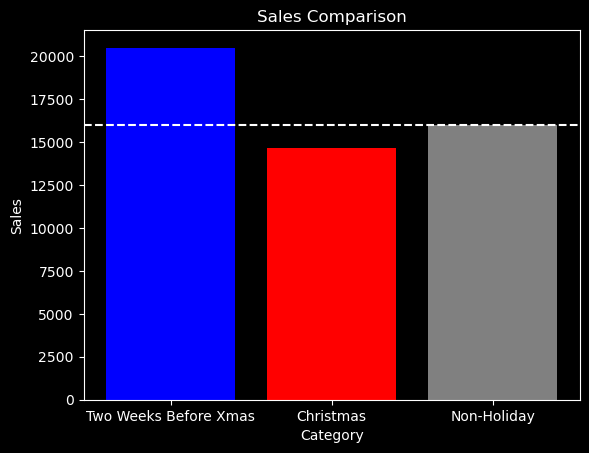

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])
x = pd.to_datetime(['2010-12-31','2011-12-30'])
vals = {
    'Two Weeks Before Xmas': df.loc[df['Date'].isin(x - pd.Timedelta(days=14)), 'Weekly_Sales'].mean(),
    'Christmas': df.loc[df['IsHoliday'] & df['Date'].isin(x), 'Weekly_Sales'].mean(),
    'Non-Holiday': df.loc[~df['IsHoliday'], 'Weekly_Sales'].mean()
}

plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.bar(vals.keys(), vals.values(), color=['blue','red','gray'])
ax.axhline(vals['Non-Holiday'], color='white', linestyle='dashed')
ax.set(xlabel='Category', ylabel='Sales', title='Sales Comparison')
plt.show()


### As we can see average sales a higher 2 weeks before xmas.

### Lets do some more exploratory analysis, build more plots

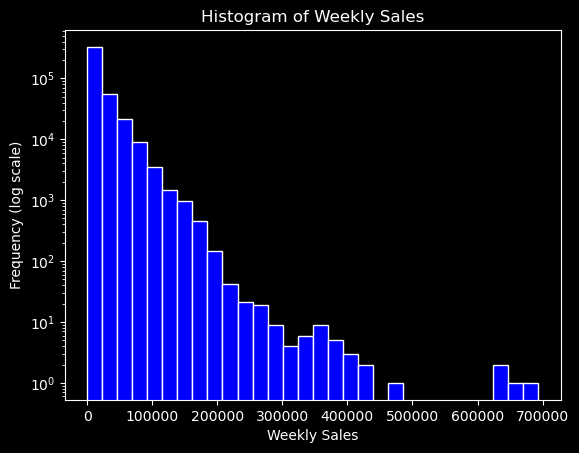

In [72]:
plt.style.use('dark_background')
plt.hist(df['Weekly_Sales'], bins=30, color='blue', edgecolor='white', linewidth=1.0)
plt.yscale('log')
plt.title("Histogram of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency (log scale)")
plt.show()



### Most of the sales lay in a range of 0-200k with some extreme cases in range of 600-700k

In [35]:
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week

### We can see a clear trend that sales follow over 2 year time

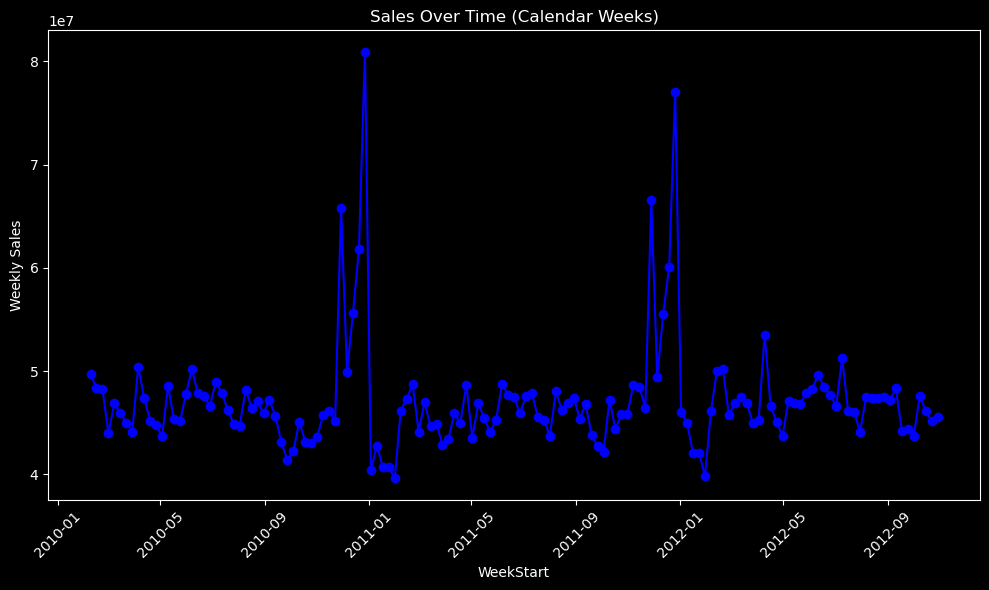

In [73]:

df['Date'] = pd.to_datetime(df['Date'])
df_weekly = df.groupby(pd.Grouper(key='Date', freq='W-MON'))['Weekly_Sales'].sum().reset_index().rename(columns={'Date':'WeekStart'})
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(df_weekly['WeekStart'], df_weekly['Weekly_Sales'], marker='o', color='blue')
plt.title('Sales Over Time (Calendar Weeks)')
plt.xlabel('WeekStart')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Here we can see that bigger store size leads to a bigger sales

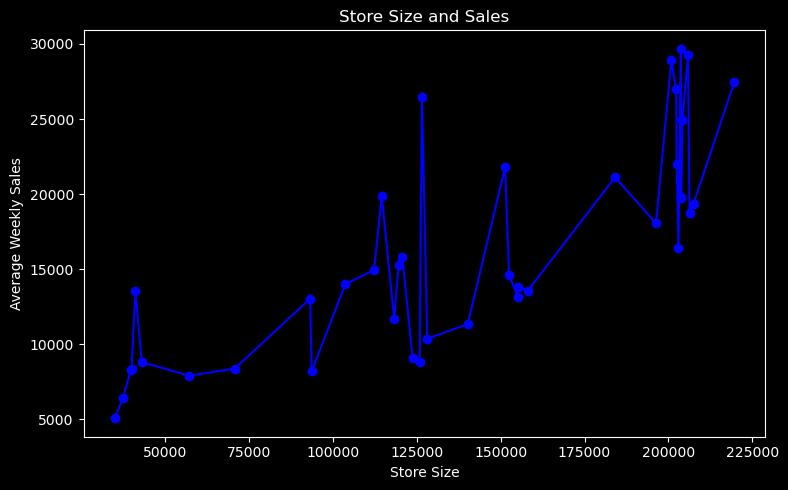

In [74]:
plt.style.use('dark_background')
sizes = df.groupby('Size')['Weekly_Sales'].mean().reset_index().sort_values('Size')
plt.figure(figsize=(8,5))
plt.plot(sizes['Size'], sizes['Weekly_Sales'], 'o-', color='blue')
plt.title('Store Size and Sales')
plt.xlabel('Store Size')
plt.ylabel('Average Weekly Sales')
plt.tight_layout(); plt.show()

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Not all the departments sell equally and Departments like 92, 95, 38 contribute the most

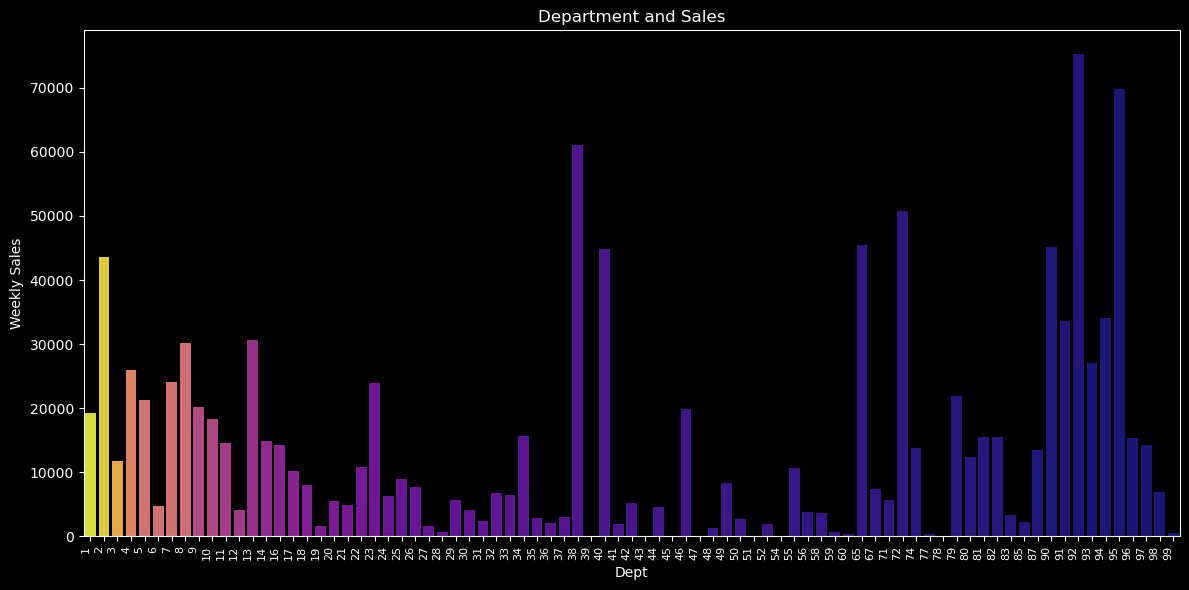

In [67]:

plt.style.use('dark_background')
depts = df.groupby('Dept', as_index=False)['Weekly_Sales'].mean().sort_values('Weekly_Sales', ascending=False)
norm = mcolors.Normalize(vmin=depts['Weekly_Sales'].min(), vmax=depts['Weekly_Sales'].max())
cmap = cm.get_cmap('plasma')
colors = [cmap(norm(val)) for val in depts['Weekly_Sales']]
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Dept', y='Weekly_Sales', data=depts, palette=colors)
plt.xticks(rotation=90, ha='right', fontsize=8)
ax.set(title='Department and Sales', xlabel='Dept', ylabel='Weekly Sales')
plt.tight_layout(); plt.show()



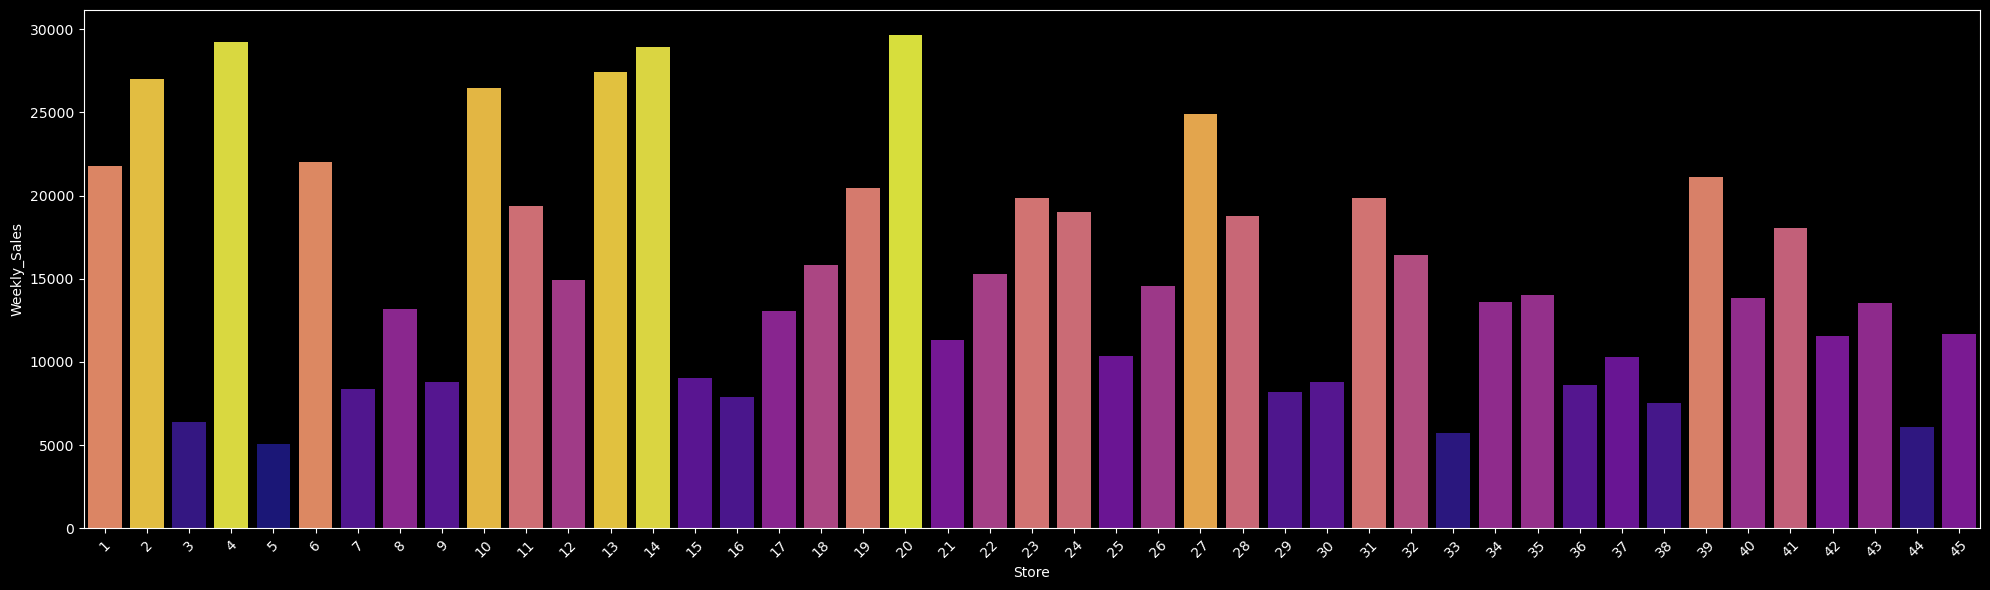

In [68]:

df_store = df.groupby('Store', as_index=False)['Weekly_Sales'].mean()
norm = mcolors.Normalize(vmin=df_store['Weekly_Sales'].min(), vmax=df_store['Weekly_Sales'].max())
cmap = cm.get_cmap('plasma')
colors = [cmap(norm(val)) for val in df_store['Weekly_Sales']]
plt.figure(figsize=(20,6))
sns.barplot(x='Store', y='Weekly_Sales', data=df_store, palette=colors)
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


### Pie chart to show the type distribution. Half of the stores are type A and almost 40 % are type B

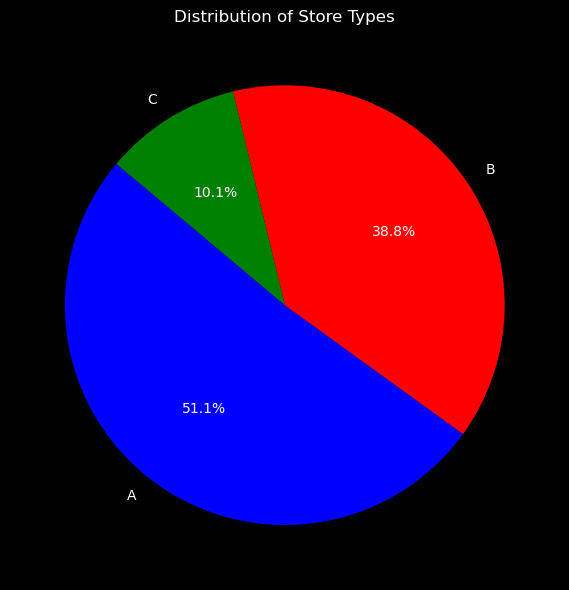

In [54]:

df_type = df['Type'].value_counts().reset_index(); df_type.columns = ['Type','Count']
plt.figure(figsize=(6,6)); plt.pie(df_type['Count'], labels=df_type['Type'], autopct='%1.1f%%', startangle=140, colors=["blue","red","green"])
plt.title('Distribution of Store Types'); plt.tight_layout(); plt.show()


### Type A store contribute to almost 65% of all the sales

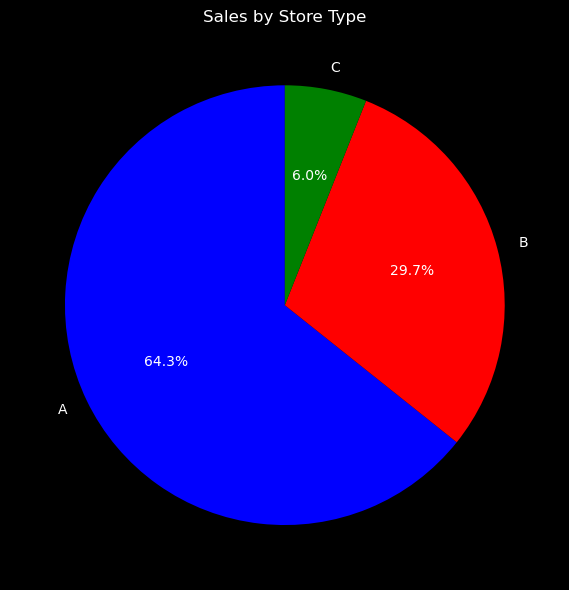

In [55]:

plt.style.use('dark_background')
df_type = df.groupby('Type', as_index=False)['Weekly_Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(df_type['Weekly_Sales'], labels=df_type['Type'], autopct='%1.1f%%', startangle=90, colors=['blue','red','green'], textprops={'color':'white'})
plt.title('Sales by Store Type', color='white'); plt.tight_layout(); plt.show()


### Type A store have the highest median weekly sales

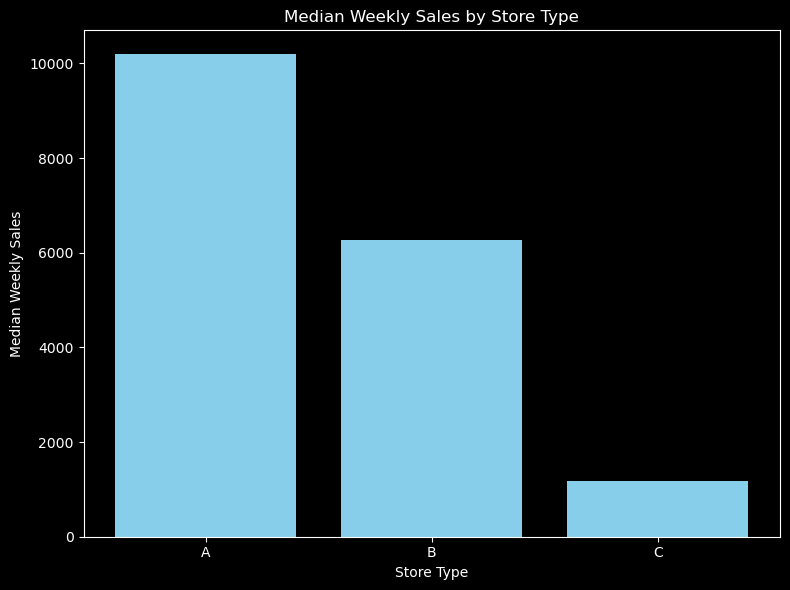

In [56]:

plt.style.use('dark_background')
df_type = df.groupby('Type', as_index=False)['Weekly_Sales'].median()
plt.figure(figsize=(8,6))
plt.bar(df_type['Type'], df_type['Weekly_Sales'], color='skyblue')
plt.title('Median Weekly Sales by Store Type'); plt.xlabel('Store Type'); plt.ylabel('Median Weekly Sales')
plt.tight_layout(); plt.show()


### Type B store have the highest median sales per sq foot 

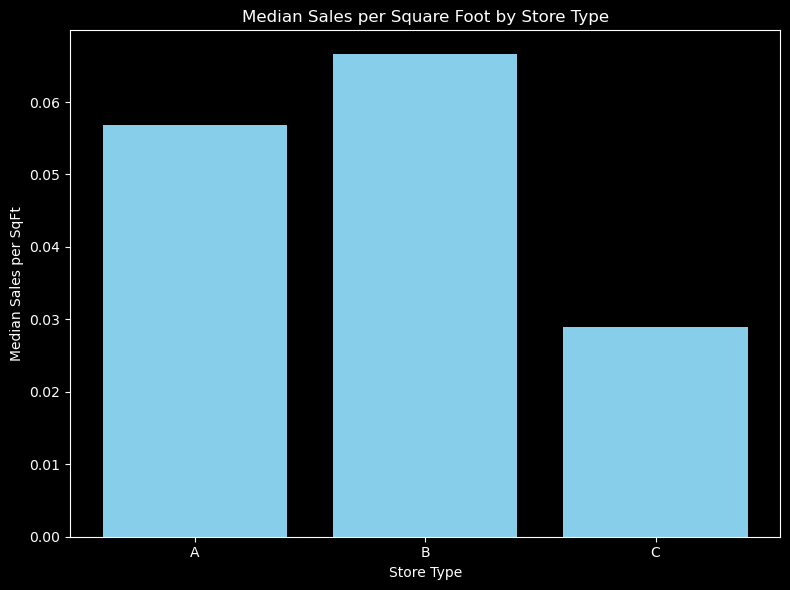

In [57]:

plt.style.use('dark_background')
df['Sales_Per_SqFt'] = df['Weekly_Sales'] / df['Size']
df_type = df.groupby('Type', as_index=False)['Sales_Per_SqFt'].median()
plt.figure(figsize=(8,6)); plt.bar(df_type['Type'], df_type['Sales_Per_SqFt'], color='skyblue')
plt.title('Median Sales per Square Foot by Store Type'); plt.xlabel('Store Type'); plt.ylabel('Median Sales per SqFt')
plt.tight_layout(); plt.show()


### We can see no clear trend to say that Fuel Price affects Weekly sales

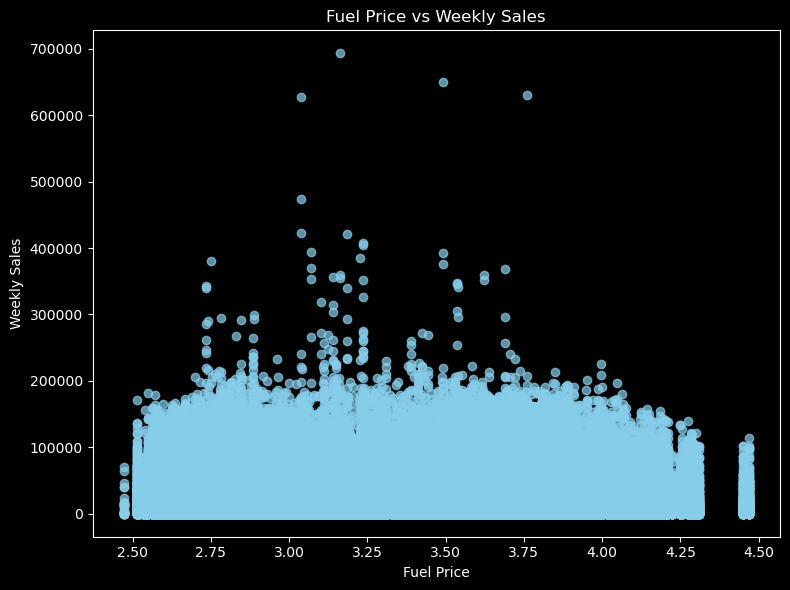

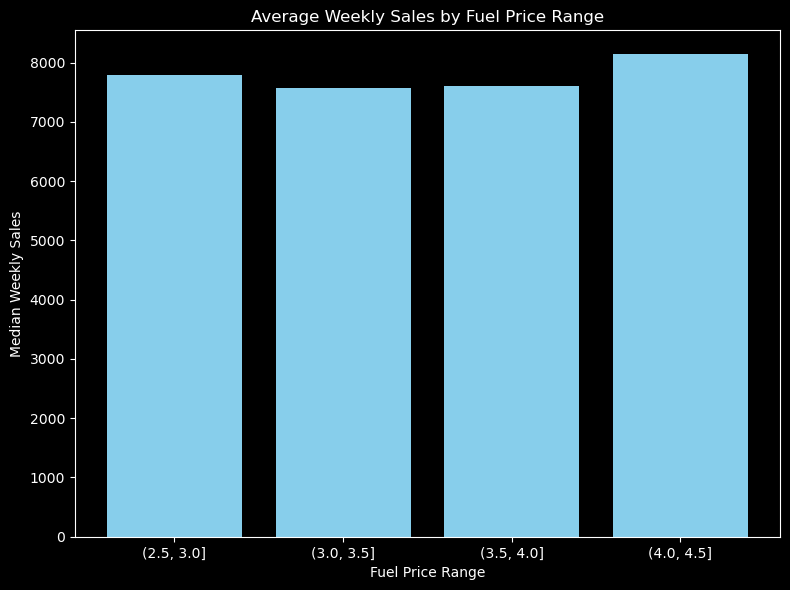

In [69]:
plt.style.use('dark_background')

# Scatter Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df["Fuel_Price"], df["Weekly_Sales"], color="skyblue", alpha=0.7)
ax.set(title="Fuel Price vs Weekly Sales", xlabel="Fuel Price", ylabel="Weekly Sales")
plt.tight_layout(); plt.show()

# Bar Chart for Binned Fuel Prices
bins = [2.5,3.0,3.5,4.0,4.5]
df['FuelBin'] = pd.cut(df['Fuel_Price'], bins=bins)
df_binned = df.groupby('FuelBin')['Weekly_Sales'].median().reset_index()
df_binned['FuelBin'] = df_binned['FuelBin'].astype(str)
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(df_binned['FuelBin'], df_binned['Weekly_Sales'], color="skyblue")
ax.set(title="Average Weekly Sales by Fuel Price Range", xlabel="Fuel Price Range", ylabel="Median Weekly Sales")
plt.tight_layout(); plt.show()



### Again the trend is not so clear but we can see that extreme hot or cold weather might affect the prices.

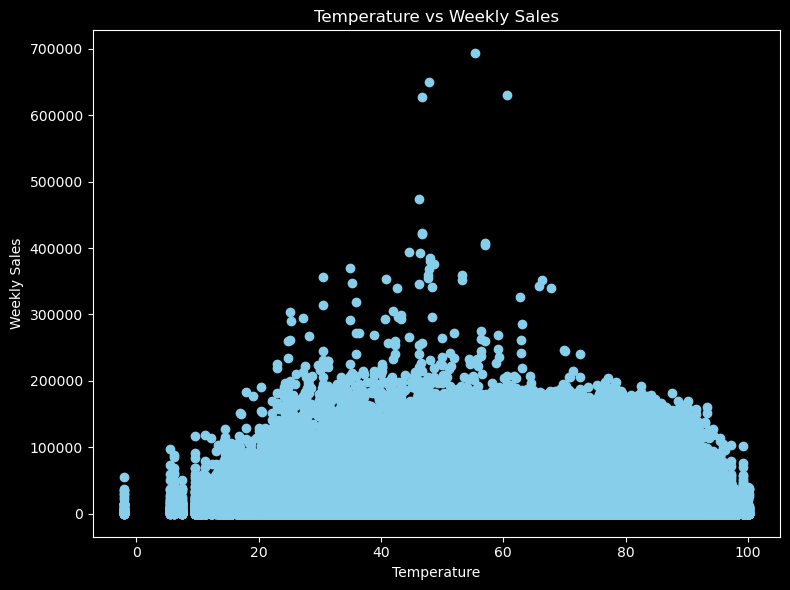

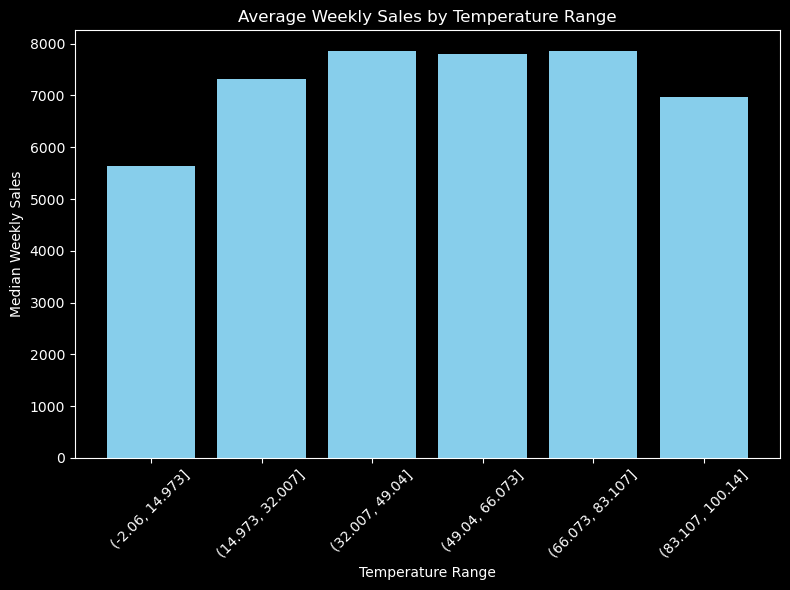

In [70]:
plt.style.use('dark_background')

# Scatter Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df["Temperature"], df["Weekly_Sales"], color="skyblue")
ax.set(title="Temperature vs Weekly Sales", xlabel="Temperature", ylabel="Weekly Sales")
plt.tight_layout(); plt.show()

# Bar Chart for Binned Temperature Ranges
bins = np.linspace(df["Temperature"].min(), df["Temperature"].max(), 7)
df["TempBin"] = pd.cut(df["Temperature"], bins=bins)
df_binned = df.groupby("TempBin")["Weekly_Sales"].median().reset_index()
df_binned["TempBin"] = df_binned["TempBin"].astype(str)
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(df_binned["TempBin"], df_binned["Weekly_Sales"], color="skyblue")
ax.set(title="Average Weekly Sales by Temperature Range", xlabel="Temperature Range", ylabel="Median Weekly Sales")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


### Also no clear trend can be found here that says that Unemployment in store affects the sales

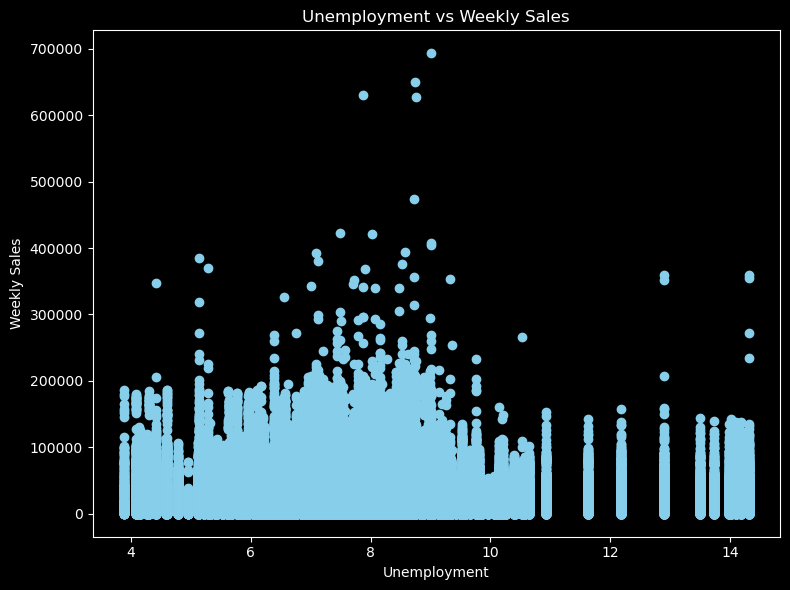

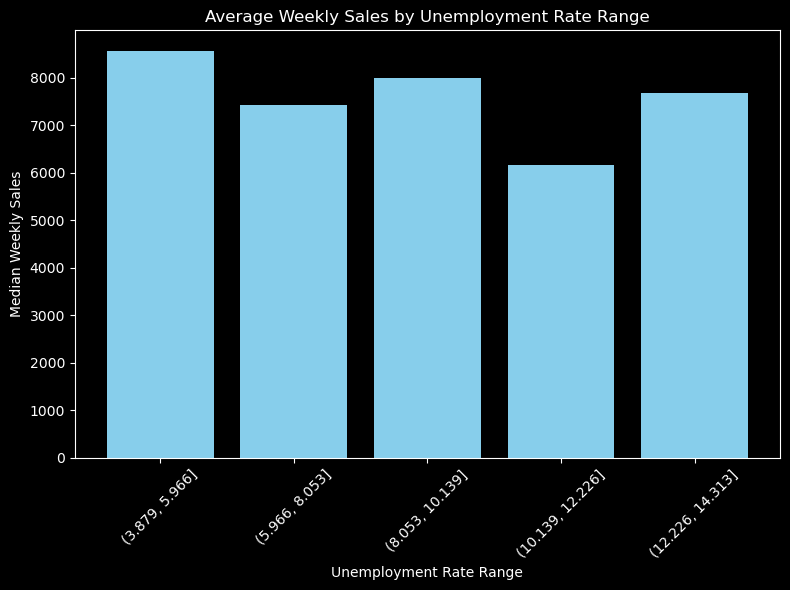

In [60]:
plt.style.use('dark_background')

# Scatter Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df["Unemployment"], df["Weekly_Sales"], color="skyblue")
ax.set(title="Unemployment vs Weekly Sales", xlabel="Unemployment", ylabel="Weekly Sales")
plt.tight_layout(); plt.show()

# Bar Chart for Binned Unemployment Rate Ranges
bins = np.linspace(df["Unemployment"].min(), df["Unemployment"].max(), 6)
df["UnempBin"] = pd.cut(df["Unemployment"], bins=bins)
df_binned = df.groupby("UnempBin", observed=False)["Weekly_Sales"].median().reset_index()
df_binned["UnempBin"] = df_binned["UnempBin"].astype(str)
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(df_binned["UnempBin"], df_binned["Weekly_Sales"], color="skyblue")
ax.set(title="Average Weekly Sales by Unemployment Rate Range", xlabel="Unemployment Rate Range", ylabel="Median Weekly Sales")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


# Findings

### 1)During the cleaning process I got rid of the minus and 0 values for sales. It was only 0,3% of data so it shouldnt affect the results of the models.
### 2)I changed null values for markdown, they were written the way as null equals to no markdown.
### 3)There are 45 stores and 81 department, it is not 1 to 45 or 1 to 81, some of them skip numbers.
### 4)There is a departments and stores that generate greater sales than others, like department number 72 or 93.
### 5)Stores have sizes, half of them market as type A and generate 60% of the sales together.
### 6) Type B store have higher median sales per sq foot than any other type.
### 7)Holidays positively contribute to a weekly sales but its worth mentioning that it is not always a case on the day or even a week when holiday takes place. For example Christmas, most of the ppl do shopping 2 weeks before leaving Christmas week with sales below average.
### 8)January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to do less shopping.
### 9)Fuel price, unemployment have no significant trend on the weekly sales, temperature on another hand might affect the numbers if cases are severe (too cold, too hot) but again the trend is not that clear to a naked eye.